In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

os.chdir(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels\HelperFunctions')
import auxiliaries as aux
os.chdir(r'C:\Users\Imper\OneDrive\Documents\Raul Castillo\College\Year - 2\SMART Program\ComparingModels')

## Autoregressive Model

- Good start
- Very inaccurate

In [2]:
multi_window = aux.WindowGenerator(input_width=aux.OUT_STEPS,
                               label_width=aux.OUT_STEPS,
                               shift=aux.OUT_STEPS,
                               cv_name='Moose\\yl1_interpolated')

print(f'Full Size: {len(multi_window.orig_df)}')
print(f'Training Size: {len(multi_window.train_df)}')
print(f'Validation Size: {len(multi_window.val_df)}')
print(f'Test Size: {len(multi_window.test_df)}')

Full Size: 7744
Training Size: 5875
Validation Size: 734
Test Size: 1135


In [3]:
feedback_model = aux.FeedBack(units=32, out_steps=aux.OUT_STEPS, num_vars=7)

In [ ]:
multi_window.train_df.head(100)

In [ ]:
next(iter(multi_window.train))

In [4]:
history = aux.compile_and_fit(feedback_model, multi_window)

Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 64s 113ms/step - loss: 1.0018 - mean_absolute_error: 0.6825 - val_loss: 1.3598 - val_mean_absolute_error: 0.9005
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 1.1100 - mean_absolute_error: 0.7635 - val_loss: 1.3035 - val_mean_absolute_error: 0.8779
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - loss: 1.0933 - mean_absolute_error: 0.7576 - val_loss: 1.2940 - val_mean_absolute_error: 0.8714
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - loss: 1.0884 - mean_absolute_error: 0.7549 - val_loss: 1.3332 - val_mean_absolute_error: 0.8800
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - loss: 1.0969 - mean_absolute_error: 0.7565 - val_loss: 1.3063 - val_mean_absolute_error: 0.8768


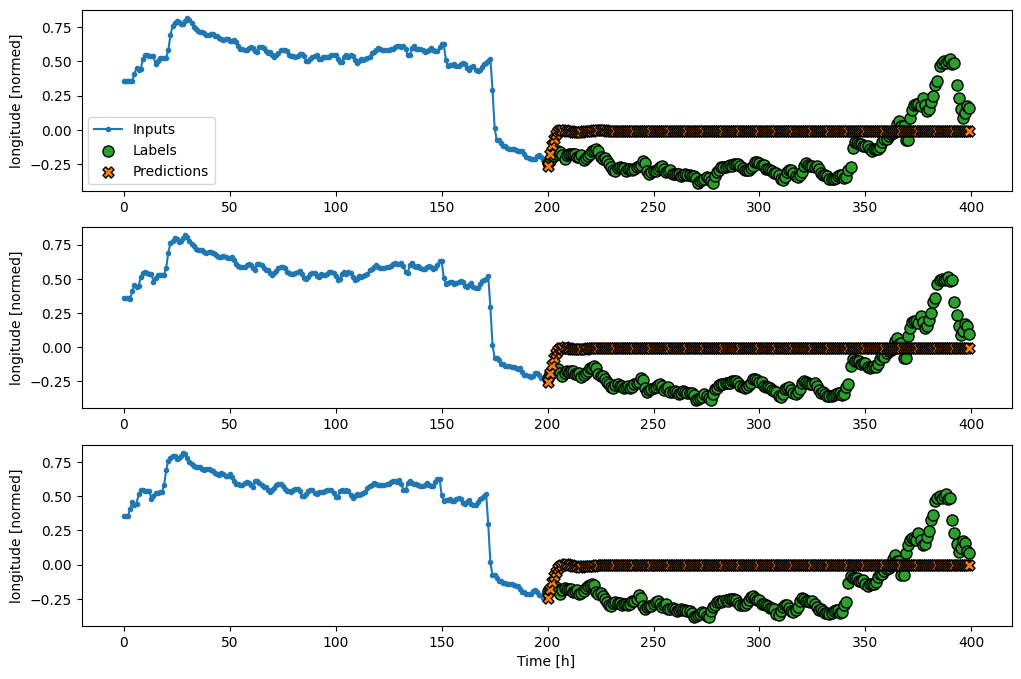

In [5]:
multi_window.plot(feedback_model, plot_col='longitude')

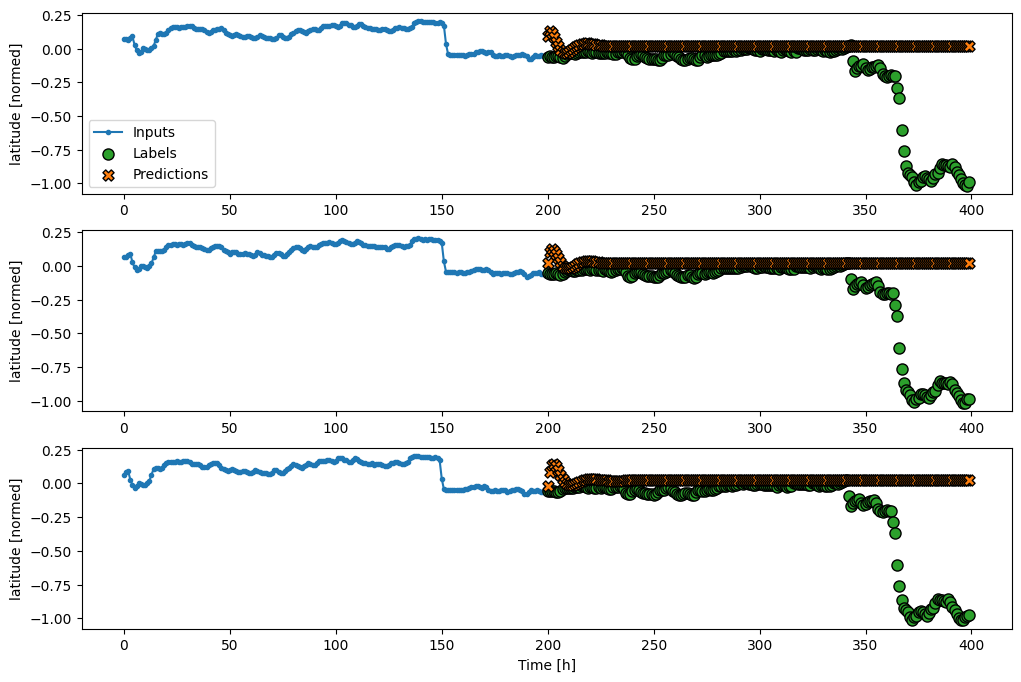

In [6]:
multi_window.plot(feedback_model, plot_col='latitude')

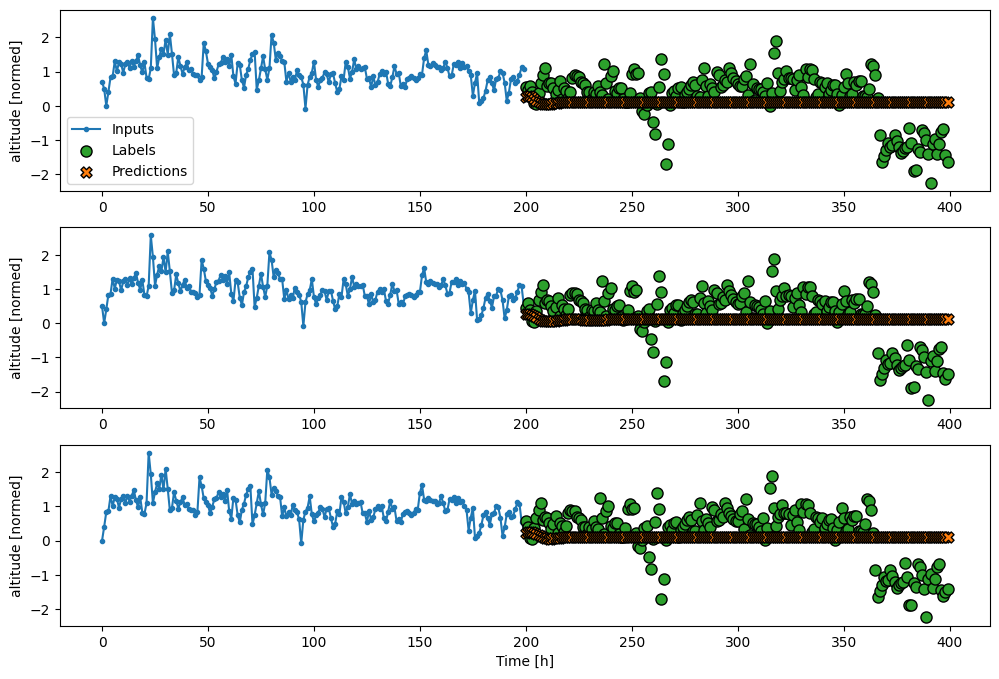

In [7]:
multi_window.plot(feedback_model, plot_col='altitude')

In [9]:
feedback_model.evaluate(multi_window.test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.9724 - mean_absolute_error: 0.7257


[1.256577491760254, 0.7628868818283081]

In [8]:
multi_window.extend_to_csv(model=feedback_model)

## Single Shot Model

## My Model